<h1 style='color:purple;'> SURVIVING TITANIC - RDEWOLF - 11.28.16</h1>
<h3>CENTRAL QUESTION TO BE ANALYZED:</h3>
<p>What impact did gender, age and class have on survival rates aboard Titanic?<p>

<h2>Datafile description from Kaggle:</h2>

VARIABLE DESCRIPTIONS:
<ul>
<li>survival:        Survival   (0 = No; 1 = Yes)</li>
<li>pclass:          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) </li>
<li>name:            Name</li>
<li>sex:             Sex</li>
<li>age:             Age</li>
<li>sibsp:           Number of Siblings/Spouses Aboard</li>
<li>parch:           Number of Parents/Children Aboard</li>
<li>ticket:          Ticket Number</li>
<li>fare:            Passenger Fare</li>
<li>cabin:           Cabin</li>
<li>embarked:        Port of Embarkation  (C = Cherbourg; Q = Queenstown; S = Southampton)</li>
</ul>

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

In [2]:
#import packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import statsmodels.api as sm

In [4]:
#upload titanic data & get basic info
titanic = pd.read_csv('C:/Users/ReneeD/Desktop/Kaggle/train.csv')
print titanic.info()
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#validate that passenger ID is unique
len(titanic) == len(titanic['PassengerId'].unique())

True

In [7]:
#drop columns unnecessary for analysis 
titanic.drop('Name', axis=1, inplace=True)
titanic.drop('SibSp', axis=1, inplace=True)
titanic.drop('Parch', axis=1, inplace=True)
titanic.drop('Ticket', axis=1, inplace=True)
titanic.drop('Fare', axis=1, inplace=True)
titanic.drop('Cabin', axis=1, inplace=True)
titanic.drop('Embarked', axis=1, inplace=True)

In [8]:
#view cleaned titanic
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


In [9]:
#Calculate total number of passengers
Passengers = len(titanic)
Passengers

891

<h1 style='font-weight:200;color:blue;'>QUESTION #1:  Did gender impact survival rate?</h1>

In [10]:
#parse total passengers by gender
Women = titanic[titanic['Sex'] == 'female']
Men = titanic[titanic['Sex'] == 'male']
print len(Women)
print len(Men)

314
577


In [11]:
#calculate passengers on board by gender
WmRate = float(len(Women))/ float(Passengers)
print WmRate
MnRate = 1 - WmRate
print MnRate

0.35241301908
0.64758698092


<h2 style='color:purple;'>64.8% of passengers on board were male and 35.2% were female</h2>

In [12]:
#Calculate total number of survivors
Survivor = titanic[titanic['Survived'] == 1]
TotSurvivor = len(Survivor)
TotSurvivor

342

In [13]:
#validate that only surivors are included in the calculation
print Survivor.Survived.min()

1


In [14]:
#Calclate overall survival rate
float(TotSurvivor) / float(len(titanic))

0.3838383838383838

<h2 style='color: purple;'> Approximately 38.4% (or 342) of the passengers aboard Titanic survived. </h2> 

In [15]:
#pass the proportion of survivors and deceased to a series to plot
s = pd.Series([TotSurvivor, float(len(titanic))-TotSurvivor], index=['Survivors', 'Deceased'])

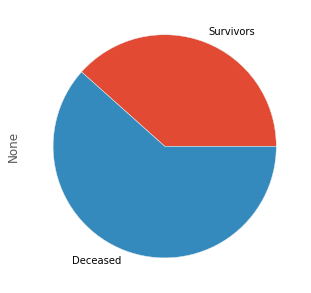

In [16]:
#plot the proportion of survivors
s.plot.pie(figsize=(5,5))

In [17]:
#Set survivors as dataframe
Survivor = pd.DataFrame(Survivor)
Survivor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 889
Data columns (total 5 columns):
PassengerId    342 non-null int64
Survived       342 non-null int64
Pclass         342 non-null int64
Sex            342 non-null object
Age            290 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 16.0+ KB


In [19]:
#Group survivors by gender
gender = Survivor.groupby('Sex').size()
gender

Sex
female    233
male      109
dtype: int64

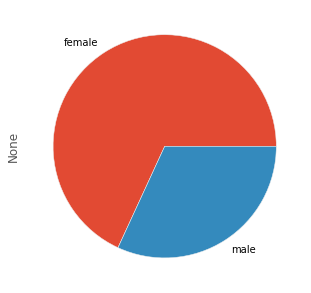

In [20]:
#plot gender distribution of survivors
gender.plot.pie(figsize=(5,5))

In [21]:
#Set gender as DataFrame
gender = pd.DataFrame(gender)

In [22]:
#Calculate proportion of survivors that were women
wmsurv = gender.ix[0] / gender.sum()
wmsurv

0    0.681287
dtype: float64

<h2 style='color:purple;'> Approximately 68.1% (or 233) of the survivors were female. </h2>
<p> Given they only represented 35.2% of passengers on board women appear to have survived disproportionately.</p>

In [23]:
mnsurv = gender.ix[1] / gender.sum()
mnsurv

0    0.318713
dtype: float64

In [24]:
#Calculate rate of female survival
gender.ix[0]/len(Women)

0    0.742038
Name: female, dtype: float64

In [25]:
#Calculate rate of male survival
gender.ix[1]/len(Men)

0    0.188908
Name: male, dtype: float64

<h2 style='color:purple;'>74.2% of female passengers and 18.9% of male passengers survived. </h2>
<p>Further evidence that women survived diaproportionately</p>

In [26]:
#Add passenger and survival counts to a series to plot
t = pd.Series([int(len(Men)), int(gender.ix[1]), int(len(Women)), int(gender.ix[0])], index=['Male Passengers', 'Male Survivors', 'Female Passengers', 'Female Survivors'])
t

Male Passengers      577
Male Survivors       109
Female Passengers    314
Female Survivors     233
dtype: int64

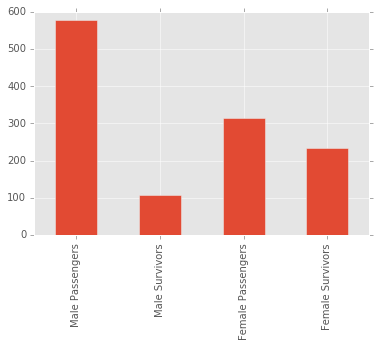

In [27]:
#plot the passenger and surival rates by gender
t.plot.bar()

In [238]:
#create new gender column to convert to number
titanic['Sex2'] = titanic['Sex']
titanic['Sex2'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex2, dtype: object

In [248]:
#Convert values to number for regression
titanic.Sex2[titanic.Sex == 'female'] = 1
titanic.Sex2[titanic.Sex == 'male'] = 2
titanic.head()

C:\Users\ReneeD\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\ReneeD\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,PassengerId,Survived,Pclass,Sex,Age,Sex2
0,1,0,3,male,22.0,2
1,2,1,1,female,38.0,1
2,3,1,3,female,26.0,1
3,4,1,1,female,35.0,1
4,5,0,3,male,35.0,2


<h2 style='color:purple;'>Further evidence that women had a higher probability of survival.</h2>
<p> But gender alone cant be used to accurately predict (gender only model is only 78.6% accurate)</p>

In [278]:
#Calculate regression of gender vs survival

from sklearn import linear_model
from sklearn import preprocessing

#initialize the model
log_model = linear_model.LogisticRegression()

#train the model
log_model.fit(X = pd.DataFrame(titanic['Sex2']), 
              y = titanic['Survived'])

# Make predictions
predictions = log_model.predict_proba(X= pd.DataFrame(titanic['Sex2']))
predictions = pd.DataFrame(predictions)
predictions.columns = ["Death_prob", "Survival_prob"]
pd.crosstab(predictions.ix[:, "Survival_prob"], titanic['Sex2'])
preds = log_model.predict(X= pd.DataFrame(titanic['Sex2']))

# Generate table of predictions vs actual
print pd.crosstab(preds,titanic["Survived"])

#Calculate model accuracy
log_model.score(X = pd.DataFrame(titanic['Sex2']) ,
                y = titanic["Survived"])

Survived    0    1
row_0             
0         468  109
1          81  233


0.78675645342312006

<h1 style='font-weight:100;color:blue;'> QUESTION #2: Does age impact survival rate?</h1>

In [279]:
#run stats for passenger age
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64

In [65]:
#count number of records with age unavailable
age_available = titanic[titanic['Age'] >0]
unavailable = len(titanic) - len(age_available)
unavailable

177

In [64]:
#calculate age unavailable rate
print float(len(age_available)) / float(len(titanic))
print len(titanic) - unavailable

0.801346801347
714


<h2 style='color:purple;'> 20% of passengers do not have any age information available in the data</h2>
<p>The next several age related analyses will focus on 714 person subset for whom an age is available</p>

In [68]:
#Remove NaN values from Age calculation
titanic_age_avail = titanic[np.isfinite(titanic['Age'])]
titanic_age_avail['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<h2 style='color:purple;'> The average passenger age was 29.7 with a median of 28</h2>

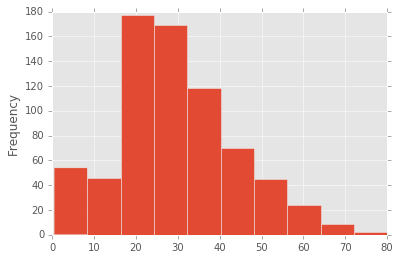

In [30]:
#plot the distribution of ages of passengers
titanic_age_avail['Age'].plot.hist()

<h2 style='color:purple;'> 75% of passengers on board were age 38 or younger</h2>

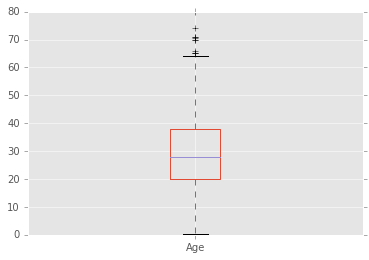

In [205]:
#plot the distibution of ages of passengers.
titanic2['Age'].plot.box()

In [41]:
#run stats on survivors where age was available
survivor_age_avail= titanic_age_avail[(titanic_age_avail['Survived'] == 1)]
survivor_age_avail['Age'].describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

<h2 style='color:purple;'> The average survivor age was 28.3 with a median of 28</h2>
<p> This is not substantially different from the overall passenger demographic</p>

<h3> Did age correlate to survival rate disproportionately for men or women?</h3>

In [45]:
#parse survival by gender for age available subset
survivor_women= titanic_age_avail[(titanic_age_avail['Survived'] == 1) & (titanic_age_avail['Sex'] == 'female')]
survivor_men= titanic_age_avail[(titanic_age_avail['Survived'] == 1) & (titanic_age_avail['Sex'] == 'male')]

In [46]:
#run stats on age available surviving women
survivor_women['Age'].describe()

count    197.000000
mean      28.847716
std       14.175073
min        0.750000
25%       19.000000
50%       28.000000
75%       38.000000
max       63.000000
Name: Age, dtype: float64

In [47]:
#run stats on age available surviving men
survivor_men['Age'].describe()

count    93.000000
mean     27.276022
std      16.504803
min       0.420000
25%      18.000000
50%      28.000000
75%      36.000000
max      80.000000
Name: Age, dtype: float64

<h2 style='color:purple;'> The men who survived were only slightly younger on average (27.3) than the women.</h2>
<p> The female survivor average ages line right up with the total demographics (which follows as they make up the majority of survivors.)  Men were 27.3 and 36 for the mean and median respectively</p>

<h2>Did children and the elderly have better or worse rates of survival?</h2>

In [51]:
#parse child and elderly passengers in age available subset
passenger_child= titanic_age_avail[(titanic_age_avail['Age'] <= 18 )]
passenger_elderly= titanic_age_avail[(titanic_age_avail['Age'] >= 65 )]
tot_child = len(passenger_child)
tot_elderly = len(passenger_elderly)

In [52]:
#parse child and elederly survivors in age available subset
survivor_child= titanic_age_avail[(titanic_age_avail['Survived'] == 1) & (titanic_age_avail['Age'] <= 18 )]
survivor_elderly= titanic_age_avail[(titanic_age_avail['Survived'] == 1) & (titanic_age_avail['Age'] >= 65 )]
chld_surv = len(survivor_child)
eld_surv = len(survivor_elderly)

<h1 style='color:purple;'> 91% of passengers aged 65 or older did not survive.  (There were only 11 on board and only 1 survived) </h1> <p>This makes the elderly survival rate disproportionately worse than the overall survival rate of 38% for passengers in general.</p>

In [54]:
#calculate child survival rate in age available subset
chld_rate = float(chld_surv)/float(tot_child)
chld_rate

0.5035971223021583

<h2 style='color:purple;'> 50% of passengers aged 18 or younger did not survive.  </h2> <p>This makes the child survival rate disproportionately better than the overall survival rate of 38% for passengers in general. (It is interesting to note that the overall survival rate of women in general exceeds that of children)</p>

In [55]:
#calculate elderly surival rate in age available subset
eld_rate = float(eld_surv)/float(tot_elderly)
eld_rate

0.09090909090909091

<h2 style='color:purple;'> 91% of passengers aged 65 or older did not survive.  </h2> <p>This makes the elderly survival rate disproportionately worse than the overall survival rate of 38% for passengers in general. (It is important to note that the there were a small number of passengers in this age group on board (11) and only 1 survived so this is a relatively small sample</p>

In [76]:
#calculate child survivor rates by gender
survivor_child_female= titanic_age_avail[(titanic_age_avail['Survived'] == 1) & (titanic_age_avail['Age'] <= 18 ) & (titanic_age_avail['Sex'] <= 'female' )]
survivor_child_male= titanic_age_avail[(titanic_age_avail['Survived'] == 1) & (titanic_age_avail['Age'] <= 18 ) & (titanic_age_avail['Sex'] <= 'male' )]
passenger_child_female= titanic_age_avail[(titanic_age_avail['Age'] <= 18 ) & (titanic_age_avail['Sex'] <= 'female' )]
passenger_child_male= titanic_age_avail[(titanic_age_avail['Age'] <= 18 ) & (titanic_age_avail['Sex'] <= 'male' )]
tot_child_passenger = float(len(passenger_child_female)) + float(len(passenger_child_male))
tot_child_survivor = float(len(survivor_child_female)) + float(len(survivor_child_male))

print float(len(survivor_child_male)) / tot_child_survivor
print float(len(survivor_child_female)) / tot_child_survivor
print float(len(passenger_child_male)) / tot_child_passenger
print float(len(passenger_child_female)) / tot_child_passenger


0.603448275862
0.396551724138
0.671497584541
0.328502415459


<h2 style='color:purple;'> Survival rates, when broken by gender, appear different for children than adults.  </h2> <p>Male children accounted for 67% of the child passengers on board and 60% of surviving children.  So gender did not negatively impact survival rate for males under the age of 18 to the same degree it imapacted males overall.</p>